In [1]:
import numpy as np
import pandas as pd
import string 
import spacy


In [2]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [3]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [4]:
import pandas
book=pd.read_csv('apple.txt',error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [5]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [6]:
book=[x.strip() for x in book.x]# remove both the leading and the trailing characters

In [7]:
book=[x for x in book if x]# removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [8]:
# Joining the list into one string/text
text=' '.join(book)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [9]:
#Punctuation
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
#with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [10]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of']


In [11]:
len(text_tokens)

3444

In [12]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
my_stop_words=stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data']


In [14]:
#Noramalize the data
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word)for word in lower_words]
print(stemmed_tokens[0:40])

['it', 'amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'student', 'coder', 'final', 'macbook', 'possess', 'got', '50k', 'diwali', 'sale', 'technic', 'good', 'laptopgood', 'newsluxuri', 'product', 'nich', 'technolog', 'good', 'batteri', 'life', 'reliabl', 'machin', 'laptop', 'crash', 'becom', 'defunct', '610', 'year', 'antiviru', 'requir', 'secur', 'data']


In [16]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:

# NLP english language model of spacy library
nlp= spacy.load('en_core_web_md')

In [23]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Its amazing battery last around 10 12 hrsbest laptop students coders Finally MacBook possession Got 50k Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine laptops crash become defunct 610 years antivirus required security data


In [25]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'get', '50k', 'Diwali', 'sale', 'technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology']


Feature Extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)

In [27]:
print(vectorizer.vocabulary_)

{'its': 431, 'amazing': 69, 'battery': 118, 'last': 455, 'around': 94, '10': 0, '12': 6, 'hrsb': 391, 'laptop': 448, 'student': 760, 'coder': 178, 'finally': 319, 'macbook': 486, 'possession': 609, 'get': 349, '50k': 34, 'diwali': 248, 'sale': 682, 'technically': 776, 'good': 354, 'laptopgood': 451, 'newsluxury': 538, 'product': 627, 'niche': 540, 'technology': 777, 'life': 464, 'reliable': 659, 'machine': 488, 'crash': 203, 'become': 122, 'defunct': 224, '610': 44, 'year': 877, 'antivirus': 80, 'require': 667, 'security': 695, 'datum': 215, 'transaction': 814, 'much': 528, 'well': 853, 'terrific': 782, 'sense': 701, 'pridebad': 619, 'news': 537, 'problem': 623, 'switch': 769, 'window': 860, 'base': 116, 'system': 770, 'less': 461, 'space': 735, 'hard': 371, 'disk': 243, 'cd': 164, 'drive': 253, 'inability': 405, 'transfer': 815, 'mac': 485, 'exist': 290, 'external': 301, 'disc': 241, 'unless': 822, 'format': 330, 'app': 83, 'mostly': 522, 'pay': 585, 'unreasonably': 823, 'expensive': 

In [29]:
print(vectorizer.get_feature_names()[50:100])


['9th', 'able', 'accidental', 'accounting', 'act', 'adapt', 'add', 'additionaly', 'advantage', 'affordable', 'after', 'again', 'againcontacted', 'ahead', 'air', 'all', 'almost', 'along', 'also', 'amazing', 'amazingnice', 'amazon', 'amazoni', 'among', 'and', 'android', 'angle', 'angry', 'another', 'answer', 'antivirus', 'anyone', 'anything', 'app', 'appario', 'apple', 'appleappleapple', 'apples', 'application', 'apprehensive', 'appropriate', 'appsnumbers', 'april', 'arenot', 'around', 'ask', 'aspect', 'atleast', 'atomic', 'audio']


In [32]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(X.toarray().shape)

(2102, 883)


Let's see how can bigrams and trigrams can be included here

In [43]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=200)

In [44]:
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [45]:
print(vectorizer_ngram_range.get_feature_names())

['2017', 'about', 'after', 'again', 'air', 'all', 'am', 'amazon', 'an', 'and', 'and it', 'any', 'apple', 'apple product', 'are', 'around', 'as', 'at', 'bad', 'battery', 'battery life', 'be', 'been', 'best', 'better', 'bought', 'but', 'buy', 'buying', 'by', 'can', 'can be', 'cannot', 'center', 'centre', 'checked', 'cost', 'days', 'dead', 'device', 'did', 'disk', 'display', 'do', 'don', 'even', 'everything', 'external', 'fine', 'for', 'from', 'from the', 'gb', 'get', 'go', 'good', 'got', 'got it', 'graphics', 'great', 'hard', 'hard disk', 'has', 'have', 'have to', 'however', 'if', 'if you', 'if you are', 'in', 'is', 'is not', 'is the', 'issue', 'issues', 'it', 'it is', 'it to', 'it was', 'its', 'just', 'keyboard', 'know', 'laptop', 'last', 'life', 'light', 'like', 'long', 'mac', 'macbook', 'macbook air', 'macos', 'may', 'me', 'month', 'months', 'motherboard', 'ms', 'much', 'my', 'need', 'need to', 'new', 'no', 'not', 'now', 'of', 'of the', 'office', 'on', 'on this', 'one', 'only', 'optio

In [46]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 2]
 [0 1 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFidf vectorizer

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)

In [50]:
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)

In [51]:
print(vectorizer_n_gram_max_features.get_feature_names())

['10', '11', '12', '128', '13', '2017', '256', '4k', '4k60fps', '50k', 'about', 'about the', 'above', 'after', 'after using', 'after using it', 'again', 'air', 'all', 'all are', 'also', 'am', 'am going', 'am going to', 'am unable', 'am unable to', 'amazing', 'amazon', 'an', 'and', 'and after', 'and is', 'and it', 'and the', 'and then', 'and they', 'and was', 'android', 'any', 'anyone', 'app', 'apple', 'apple product', 'apple products', 'apple service', 'apple support', 'appropriate', 'apps', 'april', 'are', 'are really', 'around', 'as', 'as it', 'asked for', 'at', 'at all', 'at the', 'automatically', 'available', 'awesome', 'bad', 'based', 'battery', 'battery life', 'be', 'be ignored', 'be it', 'be it the', 'because', 'been', 'being', 'best', 'best laptop', 'best laptop for', 'better', 'better than', 'board', 'both', 'bought', 'bought it', 'bought this', 'build', 'but', 'but can', 'but if', 'but if you', 'butter', 'button', 'buy', 'buying', 'by', 'can', 'can be', 'can get', 'cannot', '

In [52]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.3006345  0.         0.32224589 ... 0.         0.         0.        ]
 [0.04579461 0.         0.         ... 0.04579461 0.09158922 0.        ]
 [0.         0.         0.         ... 0.         0.11320871 0.06067341]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Generate wordcloud

In [53]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [54]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

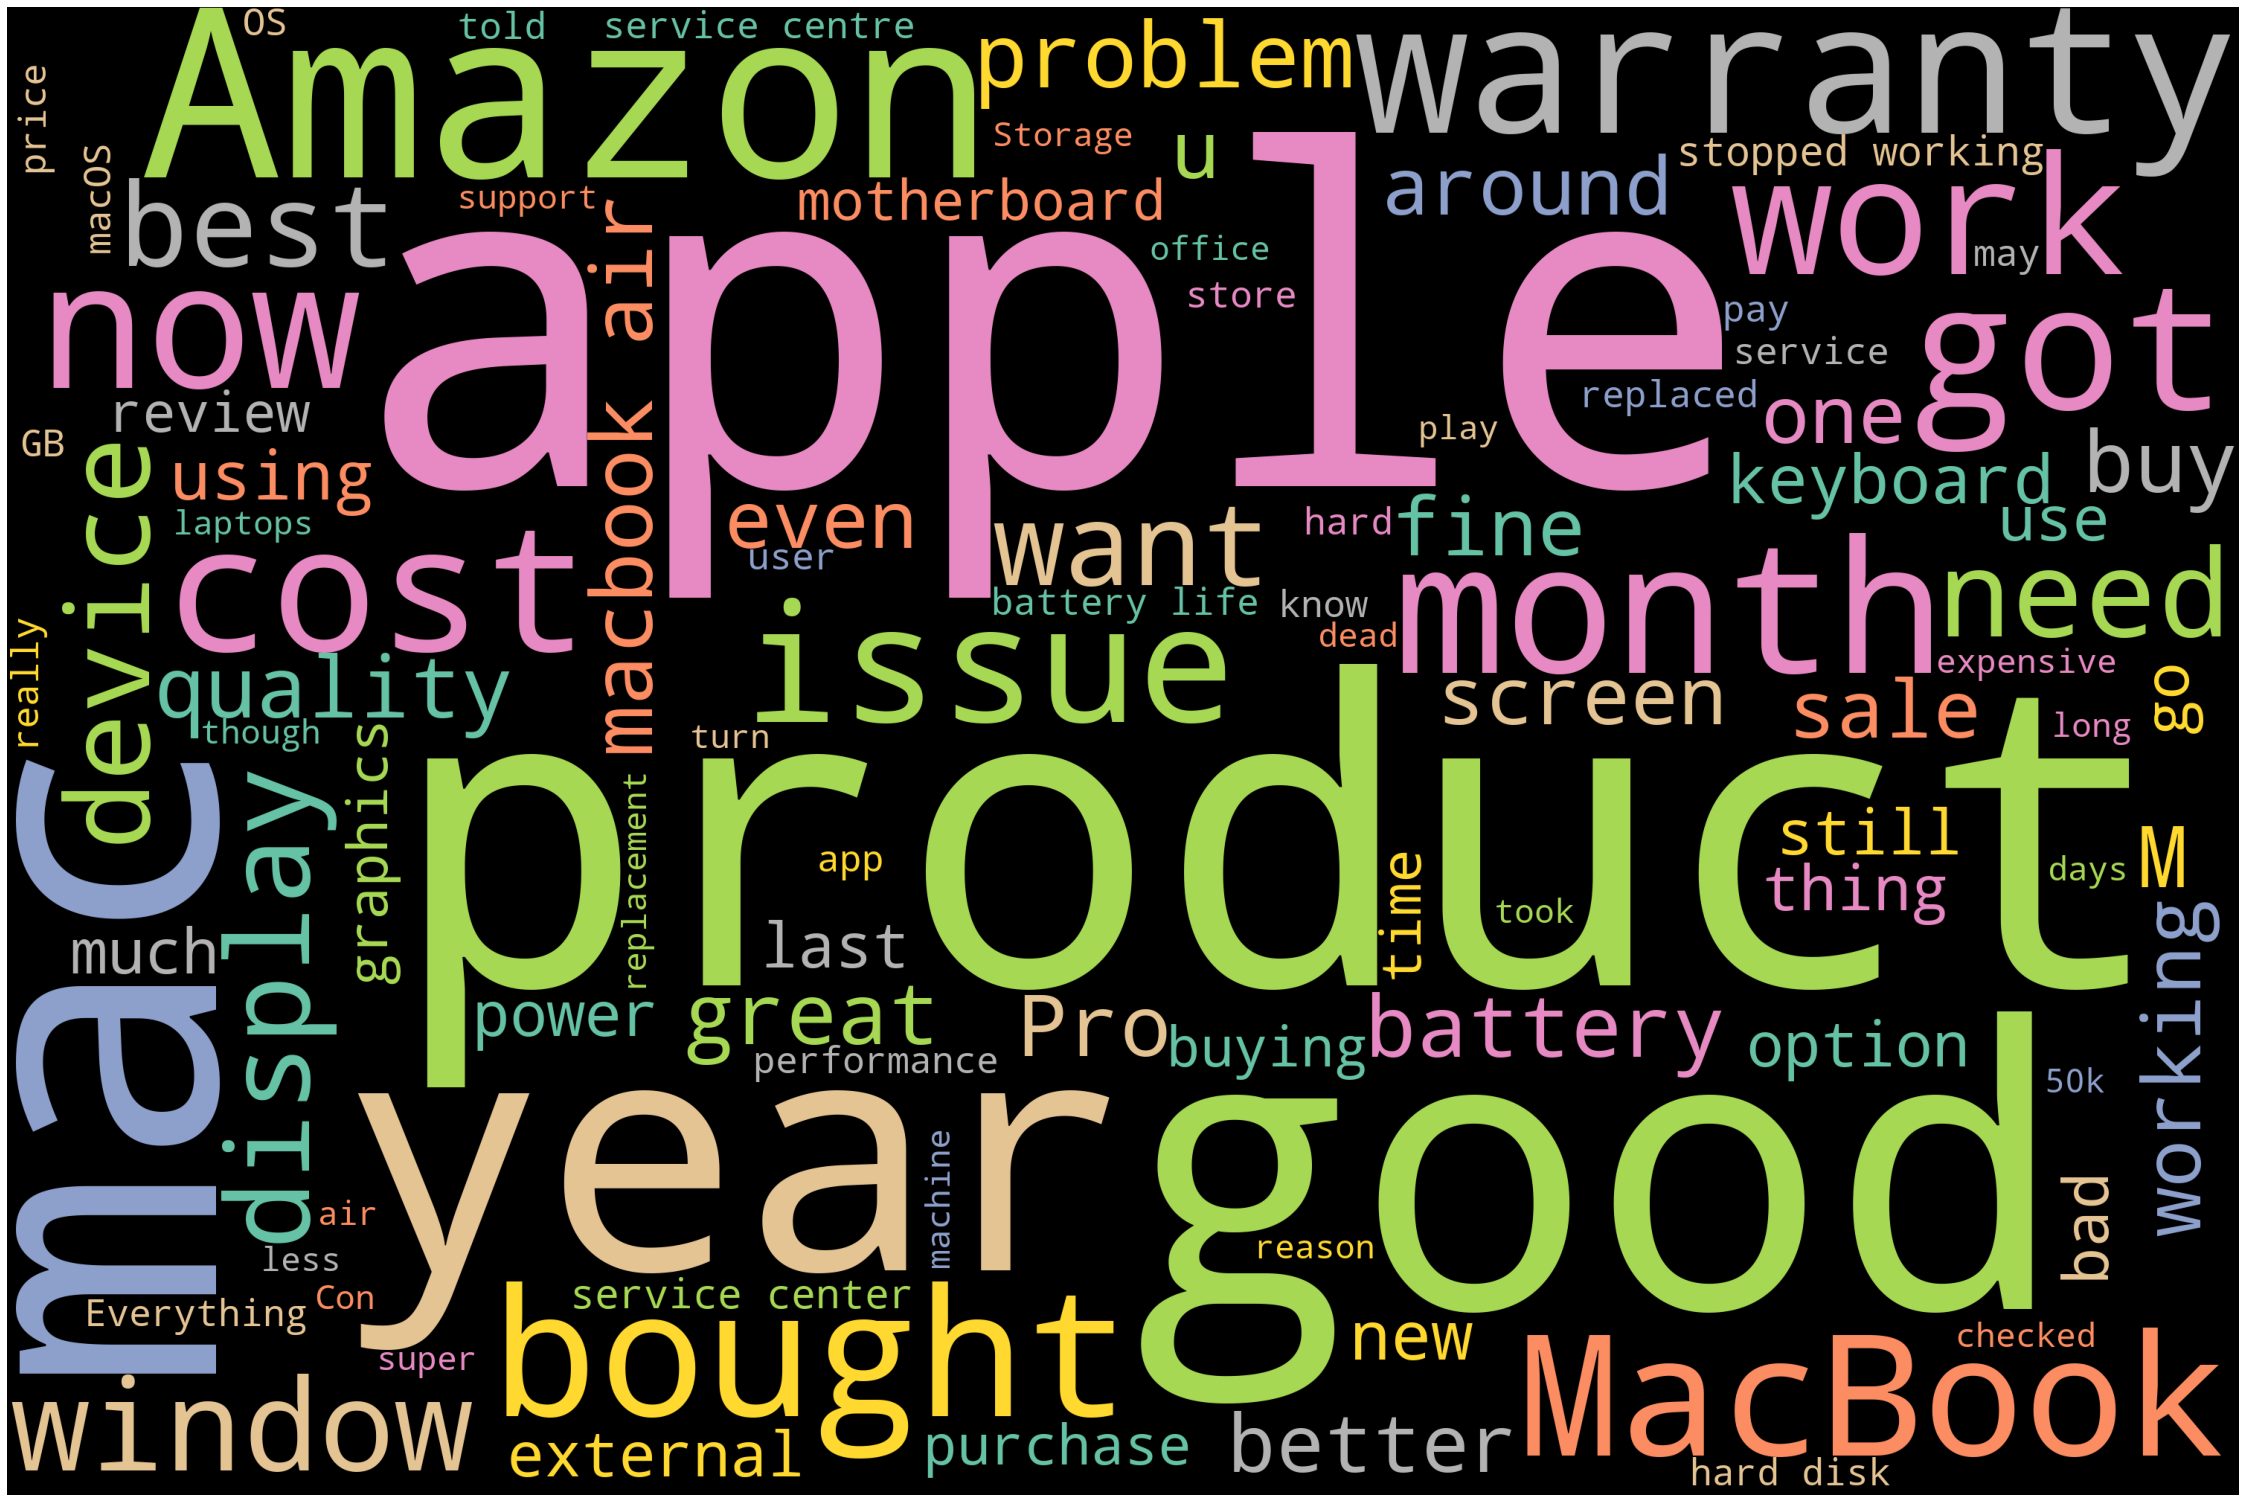

In [56]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('laptop')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [57]:
# Save image
wordcloud.to_file("wordcloud.png")